 ## Nlp iPhoneSE Reviwes: 
    
    - look at the data
    - cleaning 
    - visualize 
    - nlp cleaning 
    
    - sentment analysis
    - topic modeling
    - recommendation engine
    - clustering 

In [16]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [101]:
pd.set_option('display.max_colwidth', 10000)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics

________

In [70]:
df = pd.read_csv('APPLE_iPhone_SE.csv')
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7. Red colour looks superb.8. Portrait mode photography is Superb.READ MORE
2,5,Great product,"Who all loves older size i.e., 4.7 inch type should definitely go for this. Nothing is better than XR, XS or 11. Best for price and usage.READ MORE"
3,5,Simply awesome,"This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My purchase point was its size. If you are looking for the same you won’t be disappointed. I strongly recommend this phone to people who is more work oriented. Game loves should skip this phone as this is not a game phone. Best features with stunning looks & performance. Battery life is very good...READ MORE"
4,5,Classy product,This is my second iphone after iphone 4s. I’ve been a long time android user in between. I’ll tell you who this phone is for. Prospective buyers can then decide1. For photo and video enthusiasts. Very reliable camera. Fast and excellent picture quality. Videos are absolutely stable and professional quality. You would be amazed how many people shoot Youtube videos on an iPhone. The only downside is that the display doesn’t do justice to the photos and videos you have taken. Night photos are ...READ MORE


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


In [72]:
len(df)

9713

In [73]:
df.shape

(9713, 3)

In [74]:
df.duplicated().sum()

649

In [75]:
df.drop_duplicates(inplace=True)
df

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb build quality 2. Great display. 3. Camera is great in good lighting conditions 4. Processing is great. 5. Sound is superb. 6. Call quality is great. 7. Red colour looks superb.8. Portrait mode photography is Superb.READ MORE
2,5,Great product,"Who all loves older size i.e., 4.7 inch type should definitely go for this. Nothing is better than XR, XS or 11. Best for price and usage.READ MORE"
3,5,Simply awesome,"This iPhone SE is the best phone ever you get. Beautifully designed gives a classy look in your palms. Moreover, performance wise it is a benchmark. You will not be disappointed in this budget. My purchase point was its size. If you are looking for the same you won’t be disappointed. I strongly recommend this phone to people who is more work oriented. Game loves should skip this phone as this is not a game phone. Best features with stunning looks & performance. Battery life is very good...READ MORE"
4,5,Classy product,This is my second iphone after iphone 4s. I’ve been a long time android user in between. I’ll tell you who this phone is for. Prospective buyers can then decide1. For photo and video enthusiasts. Very reliable camera. Fast and excellent picture quality. Videos are absolutely stable and professional quality. You would be amazed how many people shoot Youtube videos on an iPhone. The only downside is that the display doesn’t do justice to the photos and videos you have taken. Night photos are ...READ MORE
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE 2020is the thinnest and pocket friendly product.READ MORE"
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [76]:
df.isna().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='count'>

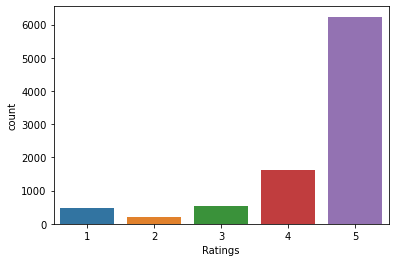

In [77]:
sns.countplot(df["Ratings"])

 - convert lower
 - english stop words 
 - panctuations

In [78]:
df['Reviews'].head(1)

0    Great camera for pics and videos Battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of 1hr or more using camera for 1hr or more listening music in my car on youtube and Bluetooth on for couple of hours it gives me full day of battery varing from 4/5 to 6/7 hours sot per dayPerformance is top notch plays every game and every task with easeVery premium phone look...READ MORE
Name: Reviews, dtype: object

In [79]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['Reviews'] = df.Reviews.map(alphanumeric).map(punc_lower)
df.head()


,Ratings,Comment,Reviews
0,5,Super!,great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of or more using camera for or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from to hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look read more
1,5,Must buy!,great device let me tell the pros superb build quality great display camera is great in good lighting conditions processing is great sound is superb call quality is great red colour looks superb portrait mode photography is superb read more
2,5,Great product,who all loves older size i e inch type should definitely go for this nothing is better than xr xs or best for price and usage read more
3,5,Simply awesome,this iphone se is the best phone ever you get beautifully designed gives a classy look in your palms moreover performance wise it is a benchmark you will not be disappointed in this budget my purchase point was its size if you are looking for the same you won’t be disappointed i strongly recommend this phone to people who is more work oriented game loves should skip this phone as this is not a game phone best features with stunning looks performance battery life is very good read more
4,5,Classy product,this is my second iphone after iphone i’ve been a long time android user in between i’ll tell you who this phone is for prospective buyers can then for photo and video enthusiasts very reliable camera fast and excellent picture quality videos are absolutely stable and professional quality you would be amazed how many people shoot youtube videos on an iphone the only downside is that the display doesn’t do justice to the photos and videos you have taken night photos are read more


In [80]:
df.sample(20)

,Ratings,Comment,Reviews
1809,5,Wonderful,worth itread more
5172,4,Good quality product,awesome phone have to compromise with large bazzles display and low battery with charger inside the box have to spend more if you need fast charger read more
7125,4,Wonderful,the battery is draining quickly read more
4697,4,Very Good,it’s a gud product from apple apple is greater then all android phones it’s awesomeread more
4709,5,Mind-blowing purchase,bought it for during bbd sale amazing phone specially for someone like me who wanted to stay on iphone and prefers fingerprint over face scan camera with apple chip covers all the bases gaming is smooth anyone whos used iphone knows app performance is way better than any flagship android battery is the only down side runs about a day on usual usage some heavy gaming and videos and you ll need to charge again by end of day read more
1185,5,Best in the market!,value for money onehand useread more
9113,5,Wonderful,phone is super good camera at the best quality sometimes overheating and battery drain fast overall good performanceread more
309,5,Just wow!,the phone is very fast and smooth never gave me any issue the battery is on low side but camera to gaming all are on top of the line for casual people you don t need a dslr this phone can take some great photos and videosread more
137,5,Perfect product!,first of all very premium and beautiful phone so cool handy stylish awesome thank u apple i have heard about the battery backup but being so low mah battery apple is giving you the quality which easily runs for a day with more than average use function is so smooth u r gonna luv this camera quality is a little bit low but over all can compromise sound quality is so good clean and strong size is small but it s up to you as company is telling it in description i personally feel it pref read more
5884,5,Wonderful,handy moderate performance device better than any android in this price tag very nice deal from flipkart a good companion for a moderate mobile user read more


In [81]:
df.Reviews[0]

'great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of   or more using camera for   or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from     to     hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look   read more'

In [82]:
# pd.set_option("max_columns", None)
pd.set_option('max_colwidth', None)
df['Reviews'].head(1)

0    great camera for pics and videos battery life is good so far with some setting turn of which i never use and when i use i turn those on and i use it in power saving mode all the time so a full day with light gaming of   or more using camera for   or more listening music in my car on youtube and bluetooth on for couple of hours it gives me full day of battery varing from     to     hours sot per dayperformance is top notch plays every game and every task with easevery premium phone look   read more
Name: Reviews, dtype: object

In [83]:
import neattext.functions as nf

In [84]:
df['Reviews'] = df['Reviews'].apply(nf.remove_puncts)
df['Reviews'] = df['Reviews'].apply(nf.remove_numbers)
df['Reviews'] = df['Reviews'].apply(nf.remove_multiple_spaces)
df['Reviews'] = df['Reviews'].apply(nf.remove_special_characters)
df['Reviews'] = df['Reviews'].apply(nf.remove_stopwords)

lower = lambda x : x.lower()
df['Reviews'].map(lower)

0                                      great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read
1                                                                                                                great device let tell pros superb build quality great display camera great good lighting conditions processing great sound superb quality great red colour looks superb portrait mode photography superb read
2                                                                                                                                                                                                                                                   loves older size e inch type definitely better xr xs best price usage read
3                iphone se best phone beaut

In [85]:
df['Reviews'] = df['Reviews'].apply(nf.clean_text)

In [86]:
df['Reviews'].head(1)

0    great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read
Name: Reviews, dtype: object

In [87]:
def add_reviews(x):
        if x['Ratings'] >= 3 : 
            text = 'Positive'

        elif x['Ratings'] < 3 : 
            text = 'Negative'
        return text

df['MyReviews'] = df.apply(add_reviews,axis=1)

In [88]:
df.head(10)

,Ratings,Comment,Reviews,MyReviews
0,5,Super!,great camera pics videos battery life good far setting turn use use turn use power saving mode time day light gaming camera listening music car youtube bluetooth couple hours gives day battery varing hours sot dayperformance notch plays game task easevery premium phone look read,Positive
1,5,Must buy!,great device let tell pros superb build quality great display camera great good lighting conditions processing great sound superb quality great red colour looks superb portrait mode photography superb read,Positive
2,5,Great product,loves older size e inch type definitely better xr xs best price usage read,Positive
3,5,Simply awesome,iphone se best phone beautifully designed gives classy look palms performance wise benchmark disappointed budget purchase point size looking wont disappointed strongly recommend phone people work oriented game loves skip phone game phone best features stunning looks performance battery life good read,Positive
4,5,Classy product,second iphone iphone ive long time android user ill tell phone prospective buyers photo video enthusiasts reliable camera fast excellent picture quality videos absolutely stable professional quality amazed people shoot youtube videos iphone downside display doesnt justice photos videos taken night photos read,Positive
5,4,Love at First Home Touch,totally worth price ios fan like compact phone want switch android iphone like clicking good photos camera unbeatable multitask normal phones stuck apps going hiatus lag like listen music speakers watch movie music feels like dolby atmos lot technical advantages dont want yo read,Positive
6,4,Wonderful,mobile handy packed good performances nice camera iphone good experience apple battery worst hardly getting hours screen time positive thing came know hours spending mobile poor battery mobile hours day read,Positive
7,4,Worth the money,compact handy good image stability gives amazing experience battery capacity little poor worth buying budget ratingread,Positive
8,4,Very Good,going use apple time amazed performance wise phone ultra camera pretty good attached images taken indoor display good best thing phone size easy use phone singe handedly excellent grip fits crisply pockets worst thing battery doesnt long better power bank avoid sudden switch read,Positive
9,3,Iphone SE Budgeted Phone of 2020?,purchased new iphone se based usage week rate product follows pros display quality good camera quality excellent takes sharp images blurriness touch sensor works precisely durability phone good quality body aluminum durable aluminum mobile industry read,Positive


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MyReviews', ylabel='count'>

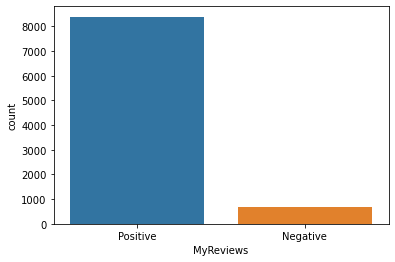

In [63]:
sns.countplot(df["MyReviews"])

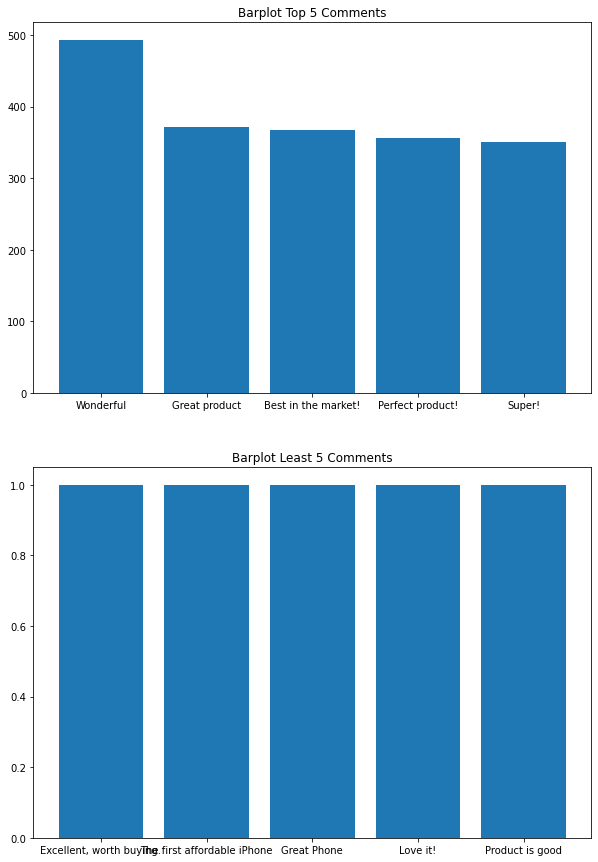

In [97]:
fig, ax = plt.subplots(2,1,figsize=(10,15))

ax[0].bar(df['Comment'].value_counts().index[:5], df['Comment'].value_counts().values[:5])
ax[0].set_title('Barplot Top 5 Comments')

ax[1].bar(df['Comment'].value_counts().index[-5:], df['Comment'].value_counts().values[-5:])
ax[1].set_title('Barplot Least 5 Comments')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


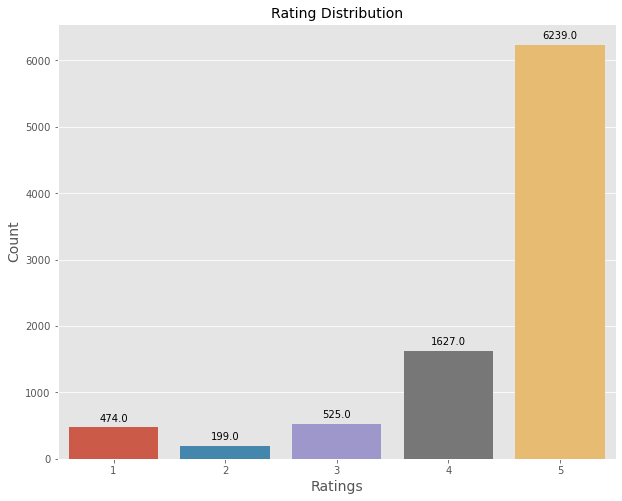

In [102]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(df['Ratings'].value_counts().index, df['Ratings'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Ratings", size=14)
plt.ylabel("Count", size=14)
plt.title('Rating Distribution', fontsize=14)
plt.show()